In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts


In [2]:
# Pull data for data frames

# John Hopkins Covid-19 Data
JH_df=pd.read_csv("Resources/jh_cases_deaths.csv")
JH_df


,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-10-24 15:24:25 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,2048,3710.14,31,56.16
1,2020-10-24 15:24:25 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,6637,3189.22,69,33.16
2,2020-10-24 15:24:25 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,1031,3998.91,9,34.91
3,2020-10-24 15:24:25 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,828,3675.59,14,62.15
4,2020-10-24 15:24:25 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1925,3339.40,25,43.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2020-10-24 15:24:25 UTC,special_exception,Utah,Central Utah,"Central Utah, Utah, US",NaN,39.372319,-111.575868,NaN,NaN,1176,NaN,7,NaN
3262,2020-10-24 15:24:25 UTC,special_exception,Utah,Southeast Utah,"Southeast Utah, Utah, US",NaN,38.996171,-110.701396,NaN,NaN,422,NaN,3,NaN
3263,2020-10-24 15:24:25 UTC,special_exception,Utah,Southwest Utah,"Southwest Utah, Utah, US",NaN,37.854472,-111.441876,NaN,NaN,5705,NaN,49,NaN
3264,2020-10-24 15:24:25 UTC,special_exception,Utah,TriCounty,"TriCounty, Utah, US",NaN,40.124915,-109.517442,NaN,NaN,384,NaN,2,NaN


In [3]:
#Clean Up Data

#Merge Counties to show only states
JH_totalpop_df=JH_df.groupby(["state"]).sum()[["total_population","confirmed","deaths"]]
JH_totalpop_df.head()

,total_population,confirmed,deaths
state,,,
Alabama,4864680.0,183276,2866
Alaska,736384.0,12113,68
Arizona,6946685.0,235882,5865
Arkansas,2990671.0,104135,1782
California,39148760.0,899799,17317


In [4]:
# Unemployment Rates: National

UnRate_National_df=pd.read_csv("Resources/UNRATE.csv")

UnRate_National_df


,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5
...,...,...
868,5/1/2020,13.3
869,6/1/2020,11.1
870,7/1/2020,10.2
871,8/1/2020,8.4


In [5]:
#Adjusting the DATE column
pd.to_datetime(UnRate_National_df["DATE"])

UnRate_National_df["DATE"]=pd.to_datetime(UnRate_National_df["DATE"])

#UnRate_National_df["DATE"].dt.year

In [6]:
UnRate_National_df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [7]:
#Clean Dates to match Colorado Data for 1990-2020
import datetime
UnRate_National_df_1990=UnRate_National_df[UnRate_National_df["DATE"] >= datetime.datetime(1990,1,1)]

#Rename Column
UnRate_National_df_1990=UnRate_National_df_1990.rename(columns={'UNRATE':'National Unemployment Rate'})

#Fixed indexing
UnRate_National_df_1990.reset_index(drop=True, inplace=True)

UnRate_National_df_1990

,DATE,National Unemployment Rate
0,1990-01-01,5.4
1,1990-02-01,5.3
2,1990-03-01,5.2
3,1990-04-01,5.4
4,1990-05-01,5.4
...,...,...
364,2020-05-01,13.3
365,2020-06-01,11.1
366,2020-07-01,10.2
367,2020-08-01,8.4


In [19]:
# Unemplyment Rates: Colorado
UnRate_Colorado_df=pd.read_csv("Resources/COLO808UR.csv")

pd.to_datetime(UnRate_Colorado_df["DATE"])
UnRate_Colorado_df["DATE"]=pd.to_datetime(UnRate_Colorado_df["DATE"])

#Rename columns
UnRate_Colorado_df=UnRate_Colorado_df.rename(columns={'COLO808UR':'Colorado Unemployment Rate'})

UnRate_Colorado_df

,DATE,Colorado Unemployment Rate
0,1990-01-01,7.2
1,1990-02-01,7.2
2,1990-03-01,7.2
3,1990-04-01,7.1
4,1990-05-01,7.1
...,...,...
363,2020-04-01,12.6
364,2020-05-01,9.9
365,2020-06-01,10.3
366,2020-07-01,6.8


In [10]:
# Merge data Colorado Unemployment and National Unemployment
UnRate_joined_df=UnRate_National_df_1990.merge(UnRate_Colorado_df, on="DATE")

#Set Index
# UnRate_joined_df=UnRate_joined_df.set_index("DATE")

#Print
UnRate_joined_df

,DATE,National Unemployment Rate,Colorado Unemployment Rate
0,1990-01-01,5.4,7.2
1,1990-02-01,5.3,7.2
2,1990-03-01,5.2,7.2
3,1990-04-01,5.4,7.1
4,1990-05-01,5.4,7.1
...,...,...,...
363,2020-04-01,14.7,12.6
364,2020-05-01,13.3,9.9
365,2020-06-01,11.1,10.3
366,2020-07-01,10.2,6.8


In [12]:
#Pull out 2020 Unemployment Data
UnRate_National_df_2020=UnRate_National_df[UnRate_National_df["DATE"] >= datetime.datetime(2020,1,1)]

#Rename Column
UnRate_National_df_2020=UnRate_National_df_2020.rename(columns={'UNRATE':'2020 National Unemployment Rate'})

#Fixed indexing
UnRate_National_df_2020.reset_index(drop=True, inplace=True)

UnRate_National_df_2020

,DATE,2020 National Unemployment Rate
0,2020-01-01,3.6
1,2020-02-01,3.5
2,2020-03-01,4.4
3,2020-04-01,14.7
4,2020-05-01,13.3
5,2020-06-01,11.1
6,2020-07-01,10.2
7,2020-08-01,8.4
8,2020-09-01,7.9


In [ ]:
#Sum Covid for National Cases


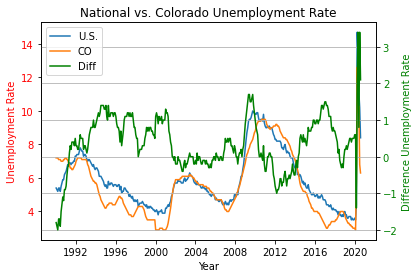

In [17]:
# Compare National Unemployment to Colorado Unemployment
# Line Plot

# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["National Unemployment Rate"])
# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["Colorado Unemployment Rate"])

Difference=UnRate_joined_df["National Unemployment Rate"]- UnRate_joined_df["Colorado Unemployment Rate"]

fig, ax1 = plt.subplots()
lns1=ax1.plot(UnRate_joined_df["DATE"], UnRate_joined_df["National Unemployment Rate"],label="U.S.")
lns2=ax1.plot(UnRate_joined_df["DATE"], UnRate_joined_df["Colorado Unemployment Rate"],label="CO")


ax1.tick_params(axis='y', labelcolor="red")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns3=ax2.plot(UnRate_joined_df["DATE"], Difference, color="green", label="Diff")
ax2.tick_params(axis='y', labelcolor="green")


plt.title("National vs. Colorado Unemployment Rate")
ax1.set_ylabel("Unemployment Rate",color="red")
ax2.set_ylabel("Difference Unemployment Rate",color="green")
ax1.set_xlabel("Year")

# Legend
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper left")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.grid()


In [ ]:
# Scatter Plot
# Create scatter plots, add a trendline, and print r-squared

def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")
    
#And then calling it 

create_scatter(df['x column name'], df['y column name'], 'Thing 1 vs Thing 2', 'Thing 1, units', 'Thing 2, units', 0.5)

In [ ]:
# Compare National Unemployment with rise in Covid Cases


In [ ]:
# Compare Colorado Unemployment with rise in Colorado Covid Cases
